# Quality

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import os

## Load Data

In [3]:
df = pd.read_csv("../results/quality/results.csv")

In [4]:
df["dataset_name"] = df.dataset.apply(lambda ds: ds.split(".")[0])

In [5]:
import re
df["channels"] = df.dataset.apply(lambda ds: int(re.search(r"(\d+)", ds).groups()[0]))

In [6]:
df["algorithm_alias"] = df.algorithm

In [7]:
df.loc[df.algorithm == "S2G++20p-MeanShift", "algorithm_alias"] = "S2G++ (MeanShift)"

In [8]:
df.loc[df.algorithm == "S2G++20p-KDE", "algorithm_alias"] = "S2G++ (KDE)"

## Plot

In [9]:
sns.set(rc={"figure.figsize":(20, 10)})

In [10]:
algorithms = ["S2G++ (KDE)", "S2G++ (MeanShift)", "mSTAMP", "DBStream", "k-Means", "LSTM-AD", "Normalizing Flows", "Torsk"]

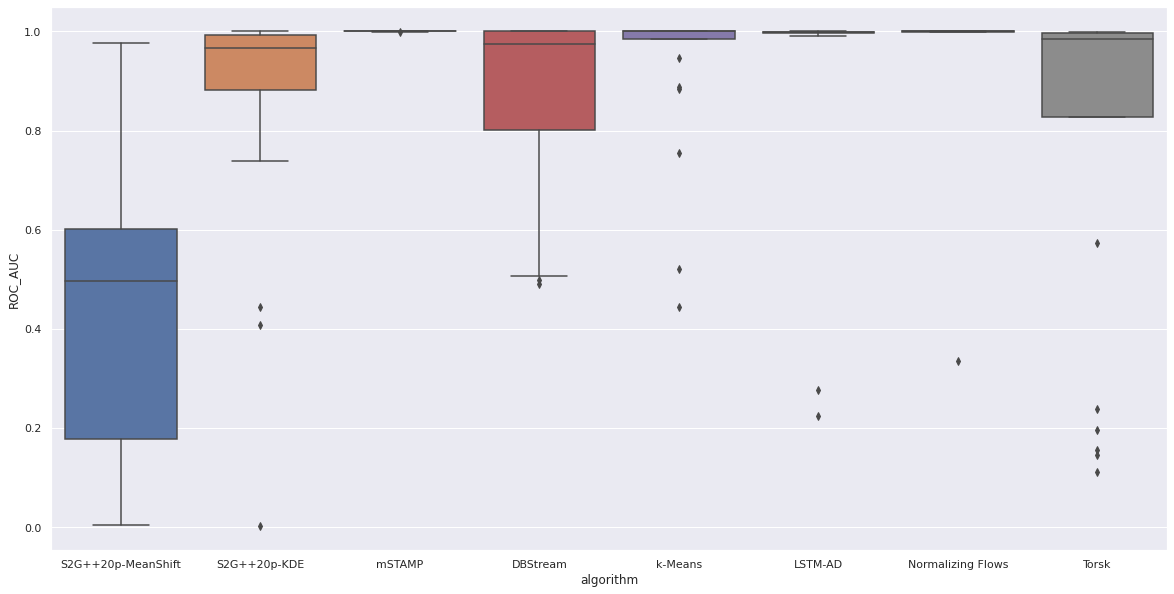

In [11]:
g = sns.boxplot(data=df[df.algorithm_alias.isin(algorithms)], x="algorithm", y="ROC_AUC")

__Export plotting data__

In [12]:
df[df.algorithm_alias.isin(algorithms)].pivot_table(index="algorithm", values="ROC_AUC", columns="dataset_name").transpose().to_csv("../data/quality_results.csv")

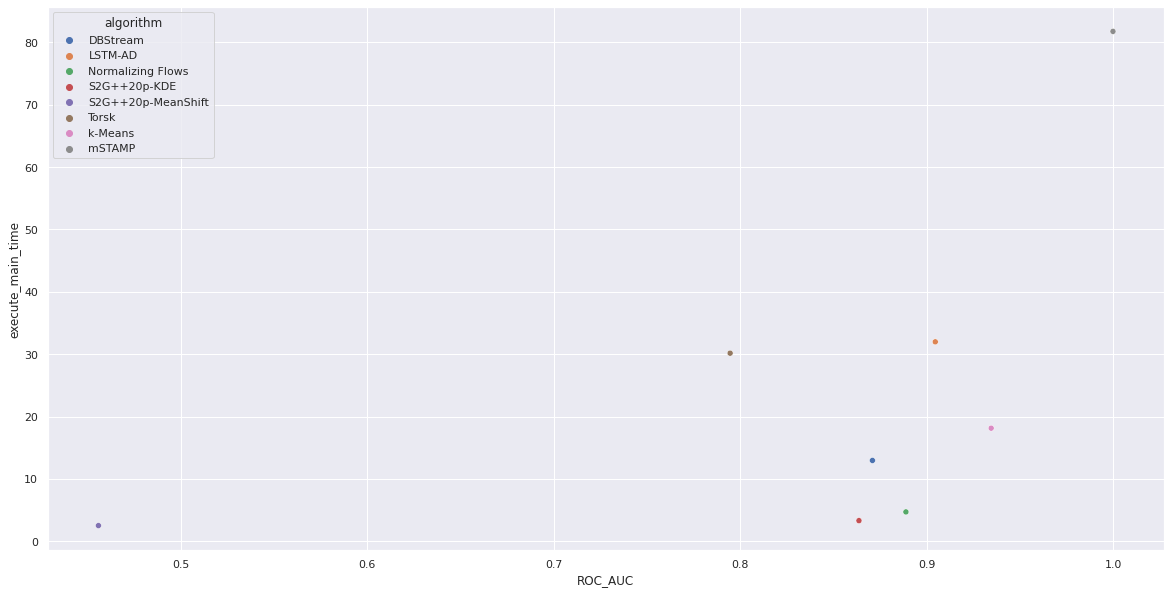

In [90]:
g = sns.scatterplot(data=df[df.algorithm_alias.isin(algorithms)].groupby("algorithm").mean(), x="ROC_AUC", y="execute_main_time", hue="algorithm")

[(2.0, 21.0)]

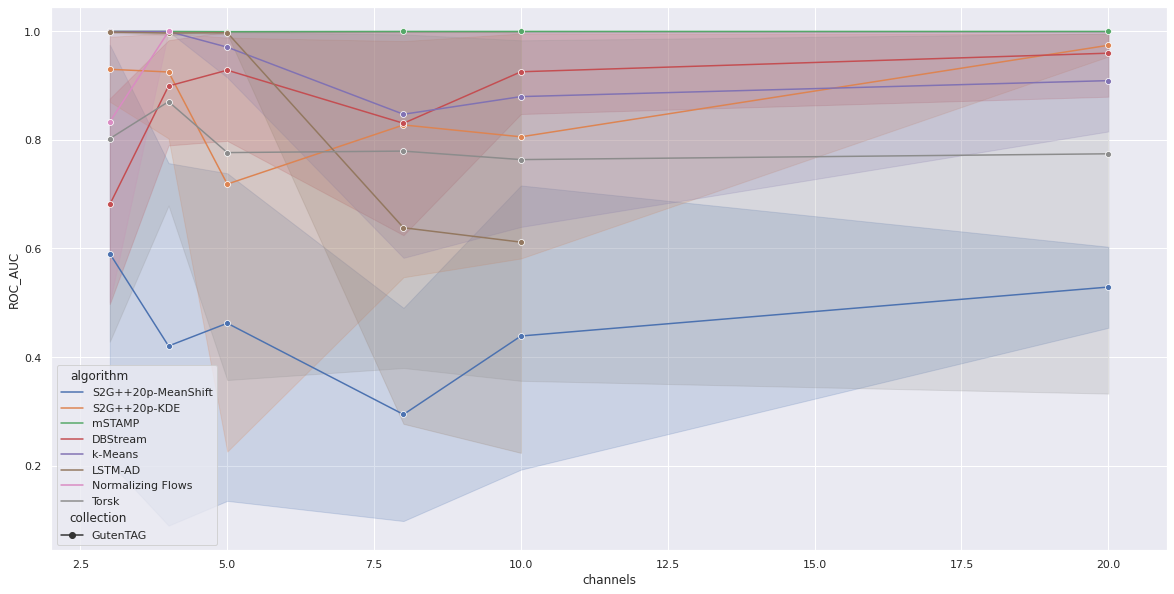

In [96]:
g = sns.lineplot(data=df[df.algorithm_alias.isin(algorithms)], x="channels", y="ROC_AUC", hue="algorithm", style="collection", markers=True)
g.set(xlim=(2, 21))
